<a href="https://colab.research.google.com/github/Zuckmo/Natural-Language-Processing-for-Demanding-Jobs/blob/main/JobstreetBI_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
from nltk.stem import PorterStemmer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("drive/My Drive/data jobstreet/datajs5 (1).xlsx")

In [ ]:
# Read in the CSV files
df1 = pd.read_csv("drive/My Drive/DataJSBI/jobstreetBI.csv")
df2 = pd.read_csv("drive/My Drive/DataJSBI/jobstreetBI (1).csv")
df3 = pd.read_csv("drive/My Drive/DataJSBI/jobstreetBI (2).csv")
df4 = pd.read_csv("drive/My Drive/DataJSBI/jobstreetBI (3).csv")
df5 = pd.read_csv("drive/My Drive/DataJSBI/jobstreetBI (4).csv")
df6 = pd.read_csv("drive/My Drive/DataJSBI/jobstreetBI (5).csv")
df7 = pd.read_csv("drive/My Drive/DataJSBI/jobstreetBI (6).csv")
df8 = pd.read_csv("drive/My Drive/DataJSBI/jobstreetBI (7).csv")
df9 = pd.read_csv("drive/My Drive/DataJSBI/jobstreetBI (8).csv")
df10 = pd.read_csv("drive/My Drive/DataJSBI/jobstreetBI (9).csv")
df11 = pd.read_csv("drive/My Drive/DataJSBI/jobstreetBI (10).csv")

In [ ]:

# Concatenate the two dataframes
df = pd.concat([df1, df2,df3, df4, df5, df6, df7, df8, df9, df10, df11], ignore_index=True)

In [ ]:
df.tail()

,perusahaan,spesialisasi,pengalaman,pekerjaan,gaji_min,gaji_max,persyaratan,deskripsi_pekerjaan,nasional
2587,rafles cakes & pastry,"manufaktur, pemeliharaan",1,operatormaintenance,0,,umur maksimal 35 tahunpendidikan minimal smkse...,pekerjaankualifikasiumur maksimal 35 tahunpend...,rafles cakes & pastry
2588,pt javaprima abadi,"manufaktur, manufaktur",1,engineeringunit,0,,usia 2228 tahunpendidikan minimal d3s1 teknik ...,pekerjaanpersyaratanusia 2228 tahunpendidikan ...,pt javaprima abadi
2590,pt sinar terang mentari,"manufaktur, pembelian/manajemen material",2,istrasigug/stock,0,,usia maksimal 30 tahunpendidikan minimal smasm...,pekerjaantugas dan tanggung jawabmahir menggun...,pt sinar terang mentari
2591,pt cahaya mas cemerlang,"manufaktur, pembelian/manajemen material",1,purchasing,4.500.000,6.300.000,s1 jurusan disukai teknik informatika teknik i...,pekerjaanstaff purchasingkami adalah perusahaa...,pt cahaya mas cemerlang
2592,pt makmur artha sejahtera,"manufaktur, pembelian/manajemen material",1,purchasing,0,,pendidikan minimal d3s1 jurusanmax umur 30 tah...,pekerjaankualifikasi pendidikan minimal d3s1 s...,pt makmur artha sejahtera


In [ ]:
# DROP UNUSED COLOUMNS
df = df.drop(['web-scraper-order', 'web-scraper-start-url', 'link-href','link'], axis=1)

In [ ]:
# mengubah seluruh huruf pada DataFrame menjadi huruf kecil
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [ ]:
df['jobdes'] = df['jobdes'].astype(str) # konversi ke tipe data string
df['jobdes'] = df['jobdes'].apply(lambda x: re.sub(r'[^\w\s]','',x)) # melakukan operasi re.sub pada kolom 'gabungan_jobdes'


In [ ]:
#df['jobdes'] = df['jobdes'].apply(lambda x: x.lower().split())


In [ ]:
"""# mengubah jobdesk menjadi lowercase dan split
df['jobdes'] = df['jobdes'].apply(lambda x: x.lower().split())

# membuat fungsi untuk mencari persyaratan
def find_requirements(text):
    persyaratan = []
    for kata in text:
        if kata in ['deskripsi', 'persyaratan']:
            index = text.index(kata)
            persyaratan.append(' '.join(text[index+1:]))
    return persyaratan

# membuat kolom baru 'persyaratan'
df['persyaratan'] = df['jobdes'].apply(find_requirements)

# menggabungkan semua persyaratan menjadi satu string
df['gabungan_persyaratan'] = df['persyaratan'].apply(lambda x: ' '.join(x))

# menampilkan semua unique values pada kolom 'gabungan_persyaratan'
pd.set_option('display.max_rows', None)
unikpersyaratan = df['gabungan_persyaratan'].value_counts()
print(unikpersyaratan)"""

"# mengubah jobdesk menjadi lowercase dan split\ndf['jobdes'] = df['jobdes'].apply(lambda x: x.lower().split())\n\n# membuat fungsi untuk mencari persyaratan\ndef find_requirements(text):\n    persyaratan = []\n    for kata in text:\n        if kata in ['deskripsi', 'persyaratan']:\n            index = text.index(kata)\n            persyaratan.append(' '.join(text[index+1:]))\n    return persyaratan\n\n# membuat kolom baru 'persyaratan'\ndf['persyaratan'] = df['jobdes'].apply(find_requirements)\n\n# menggabungkan semua persyaratan menjadi satu string\ndf['gabungan_persyaratan'] = df['persyaratan'].apply(lambda x: ' '.join(x))\n\n# menampilkan semua unique values pada kolom 'gabungan_persyaratan'\npd.set_option('display.max_rows', None)\nunikpersyaratan = df['gabungan_persyaratan'].value_counts()\nprint(unikpersyaratan)"

In [ ]:
df.head(2)

,job,perusahaan,spesialisasi,pengalaman,gaji,jobdes
0,database engineer,pt arya noble,"komputer/teknologi informasi, it-admin jaringa...",1 tahun,ditayangkan pada 8-mar-23,everything is here for youarya noble is the br...
1,enterprise data analytics sme,pt jasa teknologi informasi ibm,"komputer/teknologi informasi, it-admin jaringa...",10 tahun,idr 9.000.000 - idr 12.600.000,provides specialist knowledge and experience t...


In [ ]:
"""import nltk
from tabulate import tabulate
from nltk.stem import PorterStemmer
nltk.download('punkt')

# Membuat objek stemmer
stemmer = PorterStemmer()

# Menerapkan stemming pada kolom Requirements
df['jobdes'] = df['jobdes'].apply(lambda x: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(x)]))

# Menampilkan dataframe setelah di-stemming
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))"""


"import nltk\nfrom tabulate import tabulate\nfrom nltk.stem import PorterStemmer\nnltk.download('punkt')\n\n# Membuat objek stemmer\nstemmer = PorterStemmer()\n\n# Menerapkan stemming pada kolom Requirements\ndf['jobdes'] = df['jobdes'].apply(lambda x: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(x)]))\n\n# Menampilkan dataframe setelah di-stemming\nprint(tabulate(df, headers='keys', tablefmt='fancy_grid'))"

In [ ]:
df[['nama_depan', 'nama_belakang']] = df['job'].str.split('\)', n=1, expand=True)

In [ ]:
df[['nama_depan1', 'nama_belakang1']] = df['nama_depan'].str.split('\(', n=1, expand=True)

In [ ]:
# menghilangkan string 'idr' dari kolom 'Pekerjaan'
df['gaji'] = df['gaji'].str.replace('idr', '')

In [ ]:
# menghilangkan kata 'ditayangkan pada' dari kolom 'tanggal_tayang'
df['gaji'] = df['gaji'].str.replace(r"ditayangkan pada.*$", "0", regex=True)

In [ ]:
df[['gaji_min', 'gaji_max']] = df['gaji'].str.split('-', n=1, expand=True)

In [ ]:
# menghilangkan kata 'ditayangkan pada' dari kolom 'tanggal_tayang'
df['pengalaman'] = df['pengalaman'].str.replace(r" tahun", "", regex=True)

In [ ]:
# menghapus beberapa kolom
df = df.drop(['gaji', 'nama_depan', 'nama_belakang', 'nama_belakang1'], axis=1)

In [ ]:
import re

In [ ]:
kata_kunci = ['deskripsi', 'description','responsibilities','tugas dan tanggung jawab', 'persyaratan', 'kualifikasi', 'requirement', 'your profile','kompetensi teknis', 'knowledge & skills', 'qualification']

for kunci in kata_kunci:
    df[kunci] = df['jobdes'].str.extract(kunci + r'\s*(.*)', flags=re.IGNORECASE)[0]

In [ ]:
# mengganti nilai NaN dengan string kosong
df = df.fillna('')

In [ ]:
# menggabungkan data dari kolom1, kolom2, dan kolom3 ke dalam kolom baru
df['gabungan_persyaratan'] = df['requirement'].str.cat([df['persyaratan'],  df['kualifikasi'], df['your profile'],df['kompetensi teknis'], df['knowledge & skills'], df['qualification']], sep=' ')

In [ ]:
# menggabungkan data dari kolom1, kolom2, dan kolom3 ke dalam kolom baru
df['gabungan_jobdes'] = df['deskripsi'].str.cat([df['description'], df['responsibilities'], df['tugas dan tanggung jawab']], sep=' ')

In [ ]:
df.head(
        )

,job,perusahaan,spesialisasi,pengalaman,jobdes,nama_depan1,gaji_min,gaji_max,deskripsi,description,...,tugas dan tanggung jawab,persyaratan,kualifikasi,requirement,your profile,kompetensi teknis,knowledge & skills,qualification,gabungan_persyaratan,gabungan_jobdes
0,database engineer,pt arya noble,"komputer/teknologi informasi, it-admin jaringa...",1,everything is here for youarya noble is the br...,database engineer,0,,,,...,,,,s and provide necessary data for business oper...,s cv,,,,s and provide necessary data for business oper...,
1,enterprise data analytics sme,pt jasa teknologi informasi ibm,"komputer/teknologi informasi, it-admin jaringa...",10,provides specialist knowledge and experience t...,enterprise data analytics sme,9.000.000,12.600.000,,,...,,,,,,,,1 advanced degree in computer science engineer...,1 advanced degree in computer science en...,
2,customer analyst supervisor,pt porto indonesia sejahtera,"penjualan / pemasaran, pemasaran/pengembangan ...",4,job requirementat least 4 years of working exp...,customer analyst supervisor,0,,,,...,,,,at least 4 years of working experience as a cu...,,,,,at least 4 years of working experience as a cu...,
3,sap bw consultant,"pt. metrodata electronics, tbk","komputer/teknologi informasi, it-perangkat lunak",3,requirementat least 3 years of sap bw experien...,sap bw consultant,0,,,,...,,,,at least 3 years of sap bw experienceminimal d...,,,,,at least 3 years of sap bw experienceminimal d...,key role in the analysis design development ...
4,data analytic mentor lead,geekhunter,"komputer/teknologi informasi, it-perangkat lunak",5,job descriptionlead data training sessions by ...,data analytic mentor lead,15.000.000,20.000.000,,lead data training sessions by delivering enga...,...,,,,bachelors degree in economy accounting mathema...,,,,,bachelors degree in economy accounting mathema...,lead data training sessions by delivering eng...


In [ ]:
# DROP UNUSED COLOUMNS
df = df.drop(['job', 'jobdes','deskripsi', 'description','responsibilities','tugas dan tanggung jawab', 'persyaratan', 'kualifikasi', 'requirement', 'your profile','kompetensi teknis', 'knowledge & skills', 'qualification'], axis=1)

In [ ]:
df.head()

,perusahaan,spesialisasi,pengalaman,nama_depan1,gaji_min,gaji_max,gabungan_persyaratan,gabungan_jobdes
0,pt arya noble,"komputer/teknologi informasi, it-admin jaringa...",1,database engineer,0,,s and provide necessary data for business oper...,
1,pt jasa teknologi informasi ibm,"komputer/teknologi informasi, it-admin jaringa...",10,enterprise data analytics sme,9.000.000,12.600.000,1 advanced degree in computer science en...,
2,pt porto indonesia sejahtera,"penjualan / pemasaran, pemasaran/pengembangan ...",4,customer analyst supervisor,0,,at least 4 years of working experience as a cu...,
3,"pt. metrodata electronics, tbk","komputer/teknologi informasi, it-perangkat lunak",3,sap bw consultant,0,,at least 3 years of sap bw experienceminimal d...,key role in the analysis design development ...
4,geekhunter,"komputer/teknologi informasi, it-perangkat lunak",5,data analytic mentor lead,15.000.000,20.000.000,bachelors degree in economy accounting mathema...,lead data training sessions by delivering eng...


In [ ]:
# mengganti nilai-nilai yang muncul satu kali dengan nilai "unknown"
counts = df['spesialisasi'].value_counts()
for value, count in counts.iteritems():
    if count <= 10:
        df['spesialisasi'].replace(value, 'unknown', inplace=True)

In [ ]:
"""# mengganti nilai pada kolom yang hanya memiliki satu kemunculan
if df['spesialisasi'].value_counts()[0] <= 8:
    df['spesialisasi'] = 'lain-lainya'"""

"# mengganti nilai pada kolom yang hanya memiliki satu kemunculan\nif df['spesialisasi'].value_counts()[0] <= 8:\n    df['spesialisasi'] = 'lain-lainya'"

In [ ]:
unik_dan_jumlah = df['spesialisasi'].value_counts()
unik_dan_jumlah

manufaktur, pembelian/manajemen material                           681
manufaktur, manufaktur                                             624
                                                                   462
manufaktur, penjaminan kualitas / qa                               315
manufaktur, pemeliharaan                                           197
unknown                                                            132
teknik, teknik industri                                             67
komputer/teknologi informasi, it-perangkat lunak                    62
komputer/teknologi informasi, it-admin jaringan/sistem/database     40
penjualan / pemasaran, pemasaran/pengembangan bisnis                14
Name: spesialisasi, dtype: int64

#pekerjaan


In [ ]:
# menghilangkan string 'idr' dari kolom 'Pekerjaan'
df['nama_depan1'] = df['nama_depan1'].replace([' ','-','indonesia','officer','control','field','kontraktor','dan','bahasamandarin','foreman','mandarin','head','regu','divisi','specialist','senior','division','plastik','leader','import','mesin','bubut','jahit', 'admin','assistant','internship','general','kepala', 'shift', 'staffs','staff', 'staf','manager', 'supervisor', 'spv'], '', regex=True)

In [ ]:
# menghilangkan string 'idr' dari kolom 'Pekerjaan'
df['nama_depan1'] = df['nama_depan1'].replace(['associatequalitydemak','qualitycontrol', 'assistanceqc', 'assistenqc', 'qaqc', 'qa/qc','qc/qa'], 'qc', regex=True)

In [ ]:
# menghilangkan string 'idr' dari kolom 'Pekerjaan'
df['nama_depan1'] = df['nama_depan1'].replace(['qualityassurance','assurance'], 'qa', regex=True)

In [ ]:
# menghilangkan string 'idr' dari kolom 'Pekerjaan'
df['nama_depan1'] = df['nama_depan1'].replace([ 'productionengineerinstrument','productionroti','produksi','productioncontrol','productionoperator', 'productionplanner'], 'production', regex=True)

In [ ]:
# menghilangkan string 'idr' dari kolom 'Pekerjaan'
df['nama_depan1'] = df['nama_depan1'].replace(['picker,packer&warehouse','gudang'], 'warehouse', regex=True)

In [ ]:
# menghilangkan string 'idr' dari kolom 'Pekerjaan'
df['nama_depan1'] = df['nama_depan1'].replace(['purchasing/采购员','purchasingpt.makmurarthasejahteracirebon','purchasinghomeliving','purchasingforlogistic&packingsuppliescategory','purchasingoffice&commercialfurniture','purchasingpt.makmurarthasejahteracirebon  ','purchasingbahasa','buyer','pembelian','purcashing'], 'purchasing', regex=True)

In [ ]:
# menghilangkan string 'idr' dari kolom 'Pekerjaan'
df['nama_depan1'] = df['nama_depan1'].replace(['operatorrotaryveneer','teknisi'], 'operator', regex=True)

In [ ]:
df['nama_depan1'] = df['nama_depan1'].replace(['datascientist','dataanalyst', 'businessanalyst'], 'business analyst', regex=True)

In [ ]:
df['nama_depan1'] = df['nama_depan1'].replace(['inventoryaccounting,lokasikerja:majalaya','inventorycontrol'], 'inventory', regex=True)

In [ ]:
uniknama = df['nama_depan1'].value_counts()
uniknama.head(50)

purchasing                      272
production                      175
procurement                      71
quality                          64
warehouse                        52
ppic                             49
qa                               48
gug                              47
business analyst                 46
qc                               40
operator                         39
maintenance                      37
dataengineer                     34
karyawantoko                     30
engineering                      25
operatorproduction               22
inventory                        17
                                 12
technician                       10
sales                            10
affair                            9
storekeeper                       9
project                           9
operation                         8
stock                             8
plant                             8
managementtrainee                 6
qualitymanagementsystem     

lalalala


In [ ]:
# Menghapus baris yang memiliki kata kunci "perusahaan dirahasiakan" di kolom "perusahaan"
df = df.drop(df[df['perusahaan'] == 'perusahaan dirahasiakan'].index)


In [ ]:
unikperusahaan = df['perusahaan'].value_counts()
unikperusahaan

rgf hr agent indonesia                     17
pt. persolkelly recruitment indonesia      14
asia pulp and paper                        14
yayasan bina nusantara                     11
cimory group                               10
                                           ..
pt mitra sukses plasindo                    1
pt amcor flexibles indonesia                1
pt gawi makmur kalimantan                   1
pt. graha multi bintang (olympic group)     1
pt makmur artha sejahtera                   1
Name: perusahaan, Length: 1678, dtype: int64

In [ ]:
unikperusahaan = df['perusahaan'].value_counts().nlargest(10)
print(unikperusahaan)

rgf hr agent indonesia                     17
pt. persolkelly recruitment indonesia      14
asia pulp and paper                        14
yayasan bina nusantara                     11
cimory group                               10
pt michael page internasional indonesia    10
pt arisamandiri pratama                     9
pt bayer indonesia                          8
pt jac consulting indonesia                 8
pt halliburton indonesia                    8
Name: perusahaan, dtype: int64


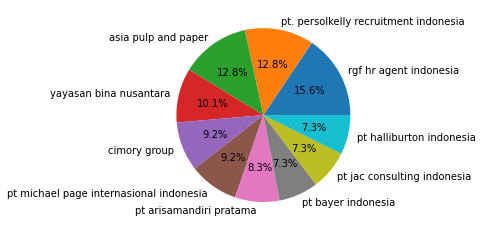

In [ ]:
unikperusahaan = df['perusahaan'].value_counts().nlargest(10)

# Membuat pie chart
plt.pie(unikperusahaan.values, labels=unikperusahaan.index, autopct='%1.1f%%')

# Menampilkan chart
plt.show()

gabung


In [ ]:
def remove_stopwords(text):
    stopwords_indo = stopwords.words('indonesian')
    return " ".join([word for word in str(text).lower().split() if word not in stopwords_indo])

# Mengaplikasikan fungsi pada kolom jobdes
df['gabungan_persyaratan'] = df['gabungan_persyaratan'].apply(remove_stopwords)


In [ ]:
unikpersyaratan= df['gabungan_persyaratan'].value_counts()
unikpersyaratan

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              197
s                                                                                     

In [ ]:
df.head()

,perusahaan,spesialisasi,pengalaman,nama_depan1,gaji_min,gaji_max,gabungan_persyaratan,gabungan_jobdes
0,pt arya noble,"komputer/teknologi informasi, it-admin jaringa...",1,databaseengineer,0,,s and provide necessary data for business oper...,
1,pt jasa teknologi informasi ibm,"komputer/teknologi informasi, it-admin jaringa...",10,enterprisedataanalyticssme,9.000.000,12.600.000,1 advanced degree in computer science engineer...,
2,pt porto indonesia sejahtera,"penjualan / pemasaran, pemasaran/pengembangan ...",4,customeranalyst,0,,at least 4 years of working experience as a cu...,
3,"pt. metrodata electronics, tbk","komputer/teknologi informasi, it-perangkat lunak",3,sapbwconsultant,0,,at least 3 years of sap bw experienceminimal d...,key role in the analysis design development ...
4,geekhunter,"komputer/teknologi informasi, it-perangkat lunak",5,dataanalyticmentorlead,15.000.000,20.000.000,bachelors degree in economy accounting mathema...,lead data training sessions by delivering eng...


In [ ]:
# melakukan penggantian nilai dengan replace
df['gabungan_persyaratan'] = df['gabungan_persyaratan'].replace('leadership', 'kepemimpinan')
df['gabungan_persyaratan'] = df['gabungan_persyaratan'].replace('negotiation',"negosiasi")
df['gabungan_persyaratan'] = df['gabungan_persyaratan'].replace('komunikasi','komunikatif')

Kata kunci 'komunikasi' ditemukan sebanyak 372 kali.
Kata kunci 'negosiasi' ditemukan sebanyak 142 kali.
Kata kunci 'mandiri' ditemukan sebanyak 106 kali.
Kata kunci 'detail' ditemukan sebanyak 273 kali.
Kata kunci 'cekatan' ditemukan sebanyak 91 kali.
Kata kunci 'bertanggungjawab' ditemukan sebanyak 60 kali.
Kata kunci 'loyal' ditemukan sebanyak 66 kali.
Kata kunci 'disiplin' ditemukan sebanyak 259 kali.
Kata kunci 'jujur' ditemukan sebanyak 337 kali.
Kata kunci 'negotiation' ditemukan sebanyak 137 kali.
Kata kunci 'management' ditemukan sebanyak 788 kali.
Kata kunci 'leadership' ditemukan sebanyak 320 kali.
Kata kunci 'kepemimpinan' ditemukan sebanyak 61 kali.
Kata kunci 'ramah' ditemukan sebanyak 43 kali.
Kata kunci 'komunikatif' ditemukan sebanyak 105 kali.


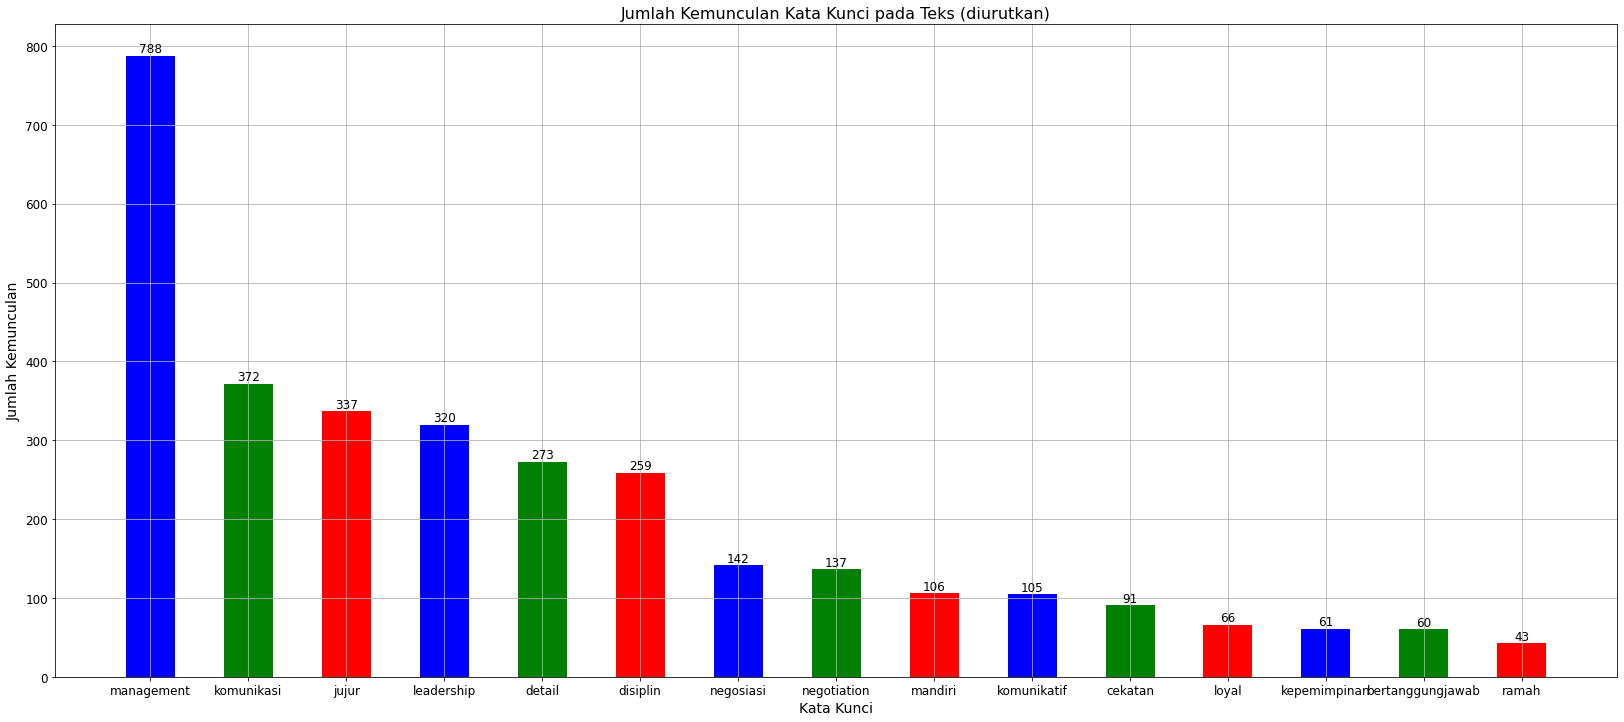

In [ ]:
import pandas as pd
import re


# Daftar kata kunci yang akan dicari
keywords = ['komunikasi',
'negosiasi',
'mandiri',
'detail',
'cekatan',
'bertanggungjawab',
'loyal',
'disiplin',
'jujur',
'negotiation',
'management',
'leadership',
"kepemimpinan",
"ramah",
"komunikatif"]


# Mencari jumlah kemunculan kata kunci pada setiap teks di dalam DataFrame
count = {}
for keyword in keywords:
    count[keyword] = 0
for text in df['gabungan_persyaratan']:
    for keyword in keywords:
        count[keyword] += len(re.findall(keyword, text, re.IGNORECASE))

# Menampilkan hanya kata kunci yang ditemukan beserta jumlah kemunculannya
for keyword, num in count.items():
    if num > 0:
        print(f"Kata kunci '{keyword}' ditemukan sebanyak {num} kali.")

# Mengurutkan data dari nilai terbesar ke terkecil
sorted_count = dict(sorted(count.items(), key=lambda item: item[1], reverse=True))

# Membuat bar plot dari jumlah kemunculan kata kunci yang sudah diurutkan
fig, ax = plt.subplots(figsize=(28, 12))
bars = ax.bar(range(len(sorted_count)), list(sorted_count.values()), align='center', color=['blue', 'green', 'red'], width=0.5)
plt.xticks(range(len(sorted_count)), list(sorted_count.keys()), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Kata Kunci', fontsize=14)
plt.ylabel('Jumlah Kemunculan', fontsize=14)
plt.title('Jumlah Kemunculan Kata Kunci pada Teks (diurutkan)', fontsize=16)

# Menambahkan nilai pada setiap bar plot
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', fontsize=12)

# Menambahkan grid
ax.grid(True)

plt.show()

In [ ]:
!pip install squarify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Kata kunci 'ipk 3' ditemukan sebanyak 8 kali.
Kata kunci 'ipk 3.5' ditemukan sebanyak 2 kali.
Kata kunci 'ipk 2.5' ditemukan sebanyak 4 kali.
Kata kunci 'ipk 2' ditemukan sebanyak 4 kali.


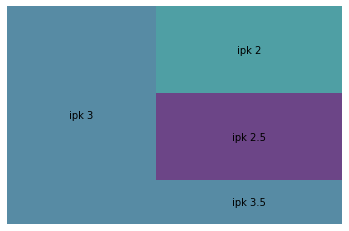

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import squarify

# Daftar kata kunci yang akan dicari
keywords_ipk = ['ipk 3', 'ipk 3.5', 'ipk 2.5', 'ipk 2']

# Mencari jumlah kemunculan kata kunci pada setiap teks di dalam DataFrame
count = {}
for keyword in keywords_ipk:
    count[keyword] = 0
for text in df['gabungan_persyaratan']:
    for keyword in keywords_ipk:
        count[keyword] += len(re.findall(keyword, text, re.IGNORECASE))

# Menampilkan hanya kata kunci yang ditemukan beserta jumlah kemunculannya
for keyword, num in count.items():
    if num > 0:
        print(f"Kata kunci '{keyword}' ditemukan sebanyak {num} kali.")

# Membuat dataframe dari dictionary count
df_count = pd.DataFrame.from_dict(count, orient='index', columns=['count'])

# Membuat treemap
squarify.plot(sizes=df_count['count'], label=df_count.index, alpha=.8)
plt.axis('off')
plt.show()


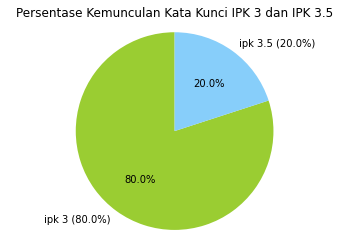

In [ ]:
import matplotlib.pyplot as plt

# Daftar kata kunci yang akan dicari
keywords_ipk = ['ipk 3', 'ipk 3.5']

# Mencari jumlah kemunculan kata kunci pada setiap teks di dalam DataFrame
count = {}
for keyword in keywords_ipk:
    count[keyword] = 0
for text in df['gabungan_persyaratan']:
    for keyword in keywords_ipk:
        count[keyword] += len(re.findall(keyword, text, re.IGNORECASE))

# Menghitung total kemunculan kata kunci
total_count = sum(count.values())

# Menghitung persentase masing-masing kata kunci
percentages = [count[keyword] / total_count * 100 for keyword in keywords_ipk]

# Menampilkan pie chart
labels = [f"{keyword} ({percentages[i]:.1f}%)" for i, keyword in enumerate(keywords_ipk)]
colors = ['yellowgreen', 'lightskyblue']
plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Persentase Kemunculan Kata Kunci IPK 3 dan IPK 3.5")

plt.show()


jobdes


In [ ]:
# membuat set kosong untuk nilai unik
unik = set()

# memisahkan setiap nilai di kolom gabungan_jobdes menjadi kata dan menambahkannya ke set unik
for job in df['gabungan_jobdes']:
    kata = job.split()
    unik.update(kata)

# menampilkan nilai unik
print(unik)

{'pentingnya', 'notejob', 'islami', 'spv', 'exportmaximum', 'score', 'visio', 'equivalentpreferably', 'industrieshave', 'inews', 'bioteknologi', 'shares', '采购周期', 'menyediakan', 'pemberitahuan', '20000', 'scm', 'packagingmelakukan', 'kerja9', 'brandedinformasi', 'medanforum', 'melamarmemiliki', 'pekerjaanhai', 'management', 'disiplininisiatif', 'analisismemiliki', 'pekerjaansehat', 'mattermeasures', 'creditors', 'needsensuring', 'knowing', 'subsea', 'toolsfluent', 'zero', 'give', 'amenities', 'consolidationaligning', 'handal', 'pekerjaanproduksi', 'departmentmaintain', 'matana', 'productsability', 'mengabarkan', 'postreview', 'electronicsinformasi', 'terorganisirluwes', 'customersutilize', 'bullarsenal', 'departemenmenyiapkan', 'baikdispilin', 'menyangkut', 'locating', 'performanceinformasi', 'bekerjaumur', 'gangguan', 'officestrong', 'gudangdapat', 'screening', 'systemsmath', '1mio', 'simultaneouslygood', 'lpsememiliki', 'othersreporting', 'elektronika', 'roleyou', 'ketentuan', 'pulp'

In [ ]:
"""import nltk
nltk.download('punkt')

# Membuat objek stemmer
stemmer = PorterStemmer()

# Menerapkan stemming pada kolom Requirements
df['gabungan_jobdes'] = df['gabungan_jobdes'].apply(lambda x: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(x)]))

# Menampilkan dataframe setelah di-stemming
print(df['gabungan_jobdes'].head())"""

"import nltk\nnltk.download('punkt')\n\n# Membuat objek stemmer\nstemmer = PorterStemmer()\n\n# Menerapkan stemming pada kolom Requirements\ndf['gabungan_jobdes'] = df['gabungan_jobdes'].apply(lambda x: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(x)]))\n\n# Menampilkan dataframe setelah di-stemming\nprint(df['gabungan_jobdes'].head())"

In [ ]:

# hitung jumlah kemunculan beberapa kata
keywords_jobdes =[
"menghitung dan menakar bahan-bahan produksi",
"cekatan, memiliki keinginan untuk belajar dan niat bekerja",
"ramah, komunikatif, jujur, dan bertanggung jawab",
"membersihkan dan merawat peralatan atau mesin yang digunakan",
"membantu proses pemindahan barang, produk, dan lainnya ketika proses produksi berjalan",
"mencampur bahan-bahan produksi sesuai dengan instruksi yang diberikan",
"membantu mengoperasikan mesin-mesin sederhana",
"mengawasi proses produksi dan mengabarkan ke tim teknisi apabila terjadi kendala pada peralatan produksi",
"melakukan supervisi seluruh aktivitas warehouse",
"control dan monitoring inbound-outbound (lapangan dan administrasi)",
"control dan monitoring kebersihan dan kerapihan penyimpanan warehouse",
"ordering bahan frozen dan dry untuk menjaga safety stock gudang",
"control dan monitoring overtime team warehouse",
"stock opname mingguan dan bersedia bekerja secara shift",
"menguasai microsoft",
"mengerti pattern dan paham teknik menjahit serta dapat memberikan solusi atas permasalahan di line sewing untuk meningkatkan target dan kualitas produksi",
"mampu memimpin bawahan dan berkoordinasi dengan bagian terkait",
"menguasai ms office",
"dapat bekerja di bawah tekanan",
"membuat rencana kerja sewing",
"bertanggung jawab terhadap kelancaran produksi/perlengkapan pendukungnya di bagian produksi khususnya di line sewing",
"dapat bertanggung jawab dan mengontrol pekerjaan di lapangan dari quality, delivery, dan productivity produksi",
"bertanggung jawab dan mengawasi pelaksanaan proses produksi, mulai dari bahan baku awal sampai menjadi barang jadi",
"membuat laporan hasil produksi secara berkala",
"bertanggung jawab meningkatkan skill operator agar menjadi lebih produktif di masing-masing line",
"bertanggung jawab atas perawatan mesin-mesin produksi",
"konsistensi dalam menerapkan metode kerja dan keselamatan",
"bertanggung jawab untuk melaksanakan fungsi pembelian untuk memenuhi kebutuhan perusahaan",
"melakukan pengadaan bahan baku dan peralatan yang diperlukan untuk produksi",
"mengelola hubungan dengan supplier dan membuat negosiasi harga yang menguntungkan bagi perusahaan",
"menjaga agar proses pembelian berjalan efisien dan efektif",
"memastikan barang yang dipesan sudah sesuai dengan spesifikasi dan waktu pengiriman",
"melakukan pemantauan terhadap pengiriman barang dan menyelesaikan masalah jika terjadi keterlambatan atau barang cacat",
"membuat laporan pembelian dan melakukan analisis untuk meningkatkan efektivitas dan efisiensi proses pembelian",
"memimpin tim pembelian dan memberikan arahan serta pelatihan untuk meningkatkan kinerja tim",
"bertanggung jawab untuk mengatur budget dan keuangan terkait dengan pembelian",
"menyusun list pembelian barang atau jasa yang dibutuhkan"]


# Mencari jumlah kemunculan kata kunci pada setiap teks di dalam DataFrame
count = {}
for keyword in keywords_jobdes:
    count[keyword] = 0
for text in df['gabungan_persyaratan']:
    for keyword in keywords_jobdes:
        count[keyword] += len(re.findall(keyword, text, re.IGNORECASE))

# Menampilkan hanya kata kunci yang ditemukan beserta jumlah kemunculannya
for keyword, num in count.items():
    if num > 0:
        print(f"Kata kunci '{keyword}' ditemukan sebanyak {num} kali.")

Kata kunci 'menguasai microsoft' ditemukan sebanyak 47 kali.
Kata kunci 'menguasai ms office' ditemukan sebanyak 36 kali.


In [ ]:
"""import pandas as pd
import re

# fungsi untuk mengekstrak persyaratan pekerjaan
def find_requirements(text):
    # regex untuk mencari persyaratan pekerjaan yang dimulai dengan 'Requirements' atau 'Qualifications'
    regex = re.compile(r'Requirements|Qualifications:?(.*)', re.IGNORECASE | re.DOTALL)
    match = regex.search(text)
    if match:
        return match.group(1)
    else:
        return None

# contoh data
data = {'gabungan_jobdes': ['Deskripsi pekerjaan 1. Requirements: - memiliki pengalaman ...',
                           'Deskripsi pekerjaan 2. Qualifications: - lulusan S1 ...',
                           'Deskripsi pekerjaan 3. Tidak ada persyaratan khusus']}

# membuat DataFrame
df = pd.DataFrame(data)

# mengekstrak persyaratan pekerjaan dan menyimpan hasilnya ke dalam kolom 'persyaratan'
df['persyaratan'] = df['gabungan_jobdes'].apply(find_requirements)

# menampilkan hasil
print(df)
"""

"import pandas as pd\nimport re\n\n# fungsi untuk mengekstrak persyaratan pekerjaan\ndef find_requirements(text):\n    # regex untuk mencari persyaratan pekerjaan yang dimulai dengan 'Requirements' atau 'Qualifications'\n    regex = re.compile(r'Requirements|Qualifications:?(.*)', re.IGNORECASE | re.DOTALL)\n    match = regex.search(text)\n    if match:\n        return match.group(1)\n    else:\n        return None\n\n# contoh data\ndata = {'gabungan_jobdes': ['Deskripsi pekerjaan 1. Requirements: - memiliki pengalaman ...',\n                           'Deskripsi pekerjaan 2. Qualifications: - lulusan S1 ...',\n                           'Deskripsi pekerjaan 3. Tidak ada persyaratan khusus']}\n\n# membuat DataFrame\ndf = pd.DataFrame(data)\n\n# mengekstrak persyaratan pekerjaan dan menyimpan hasilnya ke dalam kolom 'persyaratan'\ndf['persyaratan'] = df['gabungan_jobdes'].apply(find_requirements)\n\n# menampilkan hasil\nprint(df)\n"

In [ ]:
import pandas as pd

# List perusahaan nasional
multinasional_companies = ["acer inc.", "adidas", "allianz", "aol", "apple computer", "asus", "at&t", "bmw", "boehringer ingelheim", "bombardier", "british petroleum",
                           "chevron corporation", "coca-cola", "dell", "enron", "exxon", "fiat", "fonterra", "freeport", "general electric", "general motors", "google",
                           "grup volkswagen", "halliburton", "hearst corporation", "heckler & koch", "honda", "hsbc", "hutchison whampoa limited", "hyundai", "hewlett-packard",
                           "ibm", "intel corporation", "jardine matheson", "kfc", "kyocera", "lg electronics", "mcdonald's", "mercedes benz", "microsoft", "monsanto", "nestlé",
                           "newmont mining corporation", "nike, inc.", "nintendo", "nissan", "nokia", "ntt", "nortel networks", "opel", "orix", "parmalat", "pepsi", "petrobras",
                           "philips", "prentice hall", "prudential plc", "puma", "shell", "3m", "samsung", "schlumberger", "sony", "steyr mannlicher", "swire group",
                           "the walt disney company", "toshiba", "total s.a.", "toyota", "wal-mart stores, inc.", "yahoo"]

# Menambahkan kolom "multinasional" dengan isi data perusahaan selain dari "nasional_companies"
df['nasional'] = df['perusahaan'].apply(lambda x: x if x not in multinasional_companies else '')

# Menampilkan data frame
df["nasional"]


0                         pt arya noble
1       pt jasa teknologi informasi ibm
2          pt porto indonesia sejahtera
3        pt. metrodata electronics, tbk
4                            geekhunter
                     ...               
2587              rafles cakes & pastry
2588                 pt javaprima abadi
2590            pt sinar terang mentari
2591            pt cahaya mas cemerlang
2592          pt makmur artha sejahtera
Name: nasional, Length: 2495, dtype: object

In [ ]:
# Mengganti nama kolom 'Usia' menjadi 'Umur'
df = df.rename(columns={'nama_depan1': 'pekerjaan', 'gabungan_persyaratan':'persyaratan', 'gabungan_jobdes':'deskripsi_pekerjaan'})

In [ ]:
df.head()

,perusahaan,spesialisasi,pengalaman,pekerjaan,gaji_min,gaji_max,persyaratan,deskripsi_pekerjaan,nasional
0,pt arya noble,"komputer/teknologi informasi, it-admin jaringa...",1,databaseengineer,0,,s and provide necessary data for business oper...,,pt arya noble
1,pt jasa teknologi informasi ibm,"komputer/teknologi informasi, it-admin jaringa...",10,enterprisedataanalyticssme,9.000.000,12.600.000,1 advanced degree in computer science engineer...,,pt jasa teknologi informasi ibm
2,pt porto indonesia sejahtera,"penjualan / pemasaran, pemasaran/pengembangan ...",4,customeranalyst,0,,at least 4 years of working experience as a cu...,,pt porto indonesia sejahtera
3,"pt. metrodata electronics, tbk","komputer/teknologi informasi, it-perangkat lunak",3,sapbwconsultant,0,,at least 3 years of sap bw experienceminimal d...,key role in the analysis design development ...,"pt. metrodata electronics, tbk"
4,geekhunter,"komputer/teknologi informasi, it-perangkat lunak",5,dataanalyticmentorlead,15.000.000,20.000.000,bachelors degree in economy accounting mathema...,lead data training sessions by delivering eng...,geekhunter


In [ ]:
df = df.drop(df[df['pekerjaan'] == 'gug'].index)

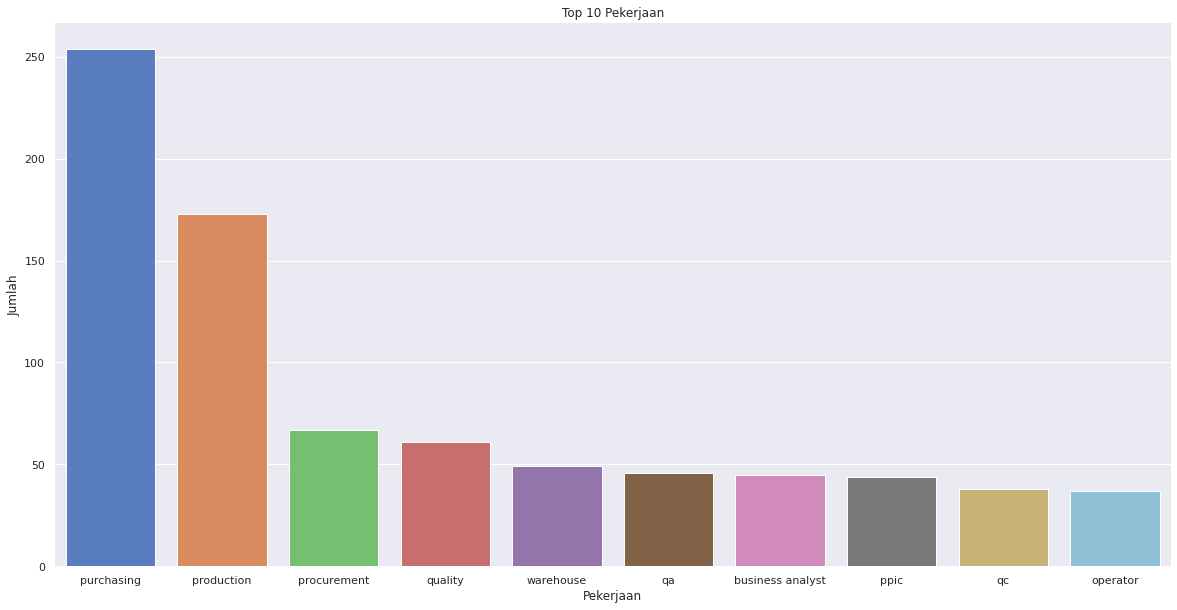

In [ ]:
import seaborn as sns

uniknama = df['pekerjaan'].value_counts().nlargest(10)
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
sns.barplot(x=uniknama.index, y=uniknama.values, palette="muted")
sns.despine(left=True, bottom=True)
plt.title('Top 10 Pekerjaan')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah')
plt.show()





In [ ]:
# mengubah nilai pada kolom 'Nama' untuk baris yang memiliki 'Nama' sama dengan 'Budi'
df.loc[df['persyaratan'] == 'negotiation', 'persyaratan'] = 'negosiasi'

Text(0.5, 1.0, 'Tree Map dari Jumlah Kemunculan Kata Kunci')

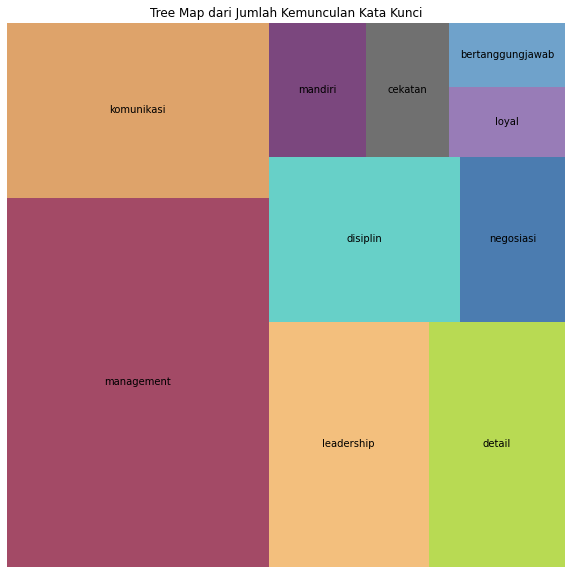

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import squarify

# Data
keywords = ['komunikasi',
'negosiasi',
'mandiri',
'detail',
'cekatan',
'bertanggungjawab',
'loyal',
'disiplin',
'management',
'leadership']

count = {}
for keyword in keywords:
    count[keyword] = 0
for text in df['persyaratan']:
    for keyword in keywords:
        count[keyword] += len(re.findall(keyword, text, re.IGNORECASE))

df_count = pd.DataFrame.from_dict(count, orient='index', columns=['count'])

# Sort dataframe by count
df_count = df_count.sort_values(by='count', ascending=False)

# Assign colors to each keyword
color = ['#8c1d40', '#d68c45', '#f0b05d', '#a7d129', '#42c5bb', '#1e5c9d', '#5b195e', '#4d4d4d', '#7f5ca5', '#4b8bbe']
color = dict(zip(df_count.index, color))

# Plot
plt.figure(figsize=(10,10))
squarify.plot(sizes=df_count['count'], label=df_count.index, alpha=.8, color=[color[x] for x in df_count.index])

# Format
plt.axis('off')
plt.title('Tree Map dari Jumlah Kemunculan Kata Kunci')



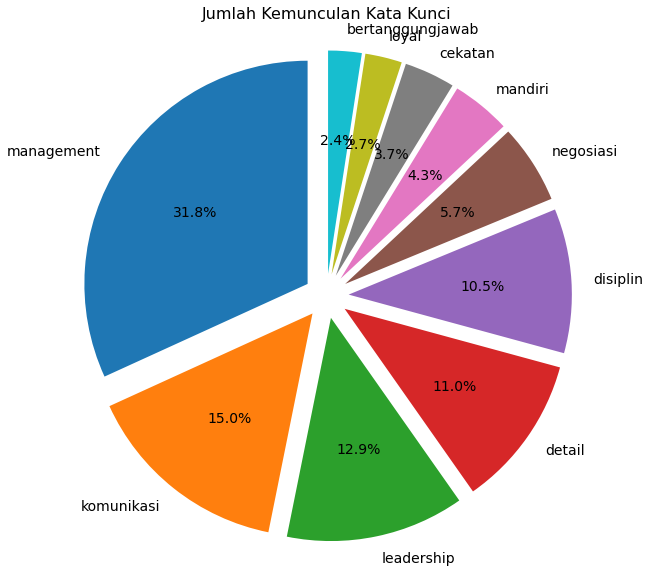

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Daftar kata kunci yang akan dicari
keywords = ['komunikasi',
'negosiasi',
'mandiri',
'detail',
'cekatan',
'bertanggungjawab',
'loyal',
'disiplin',

'management',
'leadership']

# Mencari jumlah kemunculan kata kunci pada setiap teks di dalam DataFrame
count = {}
for keyword in keywords:
    count[keyword] = 0
for text in df['persyaratan']:
    for keyword in keywords:
        count[keyword] += len(re.findall(keyword, text, re.IGNORECASE))

# Membuat DataFrame dari hasil pencarian kata kunci
df_count = pd.DataFrame.from_dict(count, orient='index', columns=['count'])

# Mengurutkan DataFrame berdasarkan jumlah kemunculan kata kunci
df_count = df_count.sort_values(by='count', ascending=False)

# Membuat circular area chart
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
explode = [0.1] * len(df_count)
ax.pie(df_count['count'], labels=df_count.index, autopct='%1.1f%%', startangle=90, explode=explode, textprops={'fontsize': 14})
ax.set_title('Jumlah Kemunculan Kata Kunci', fontsize=16)
plt.show()


In [ ]:
# Mengelompokkan data berdasarkan kolom 'pekerjaan'
grouped = df.groupby('pekerjaan')

# Menampilkan data pada kelompok pekerjaan 'dokter'
ba = grouped.get_group('business analyst')
ba.tail()

,perusahaan,spesialisasi,pengalaman,pekerjaan,gaji_min,gaji_max,persyaratan,deskripsi_pekerjaan,nasional
220,pt. cipta harmoni lestari,unknown,4,business analyst,0,,sarjana s1 jurusan keuangan akutansi statistik...,,pt. cipta harmoni lestari
223,pt michael page internasional indonesia,"komputer/teknologi informasi, it-perangkat lunak",5,business analyst,0,,,working scope includes but is not limited to,pt michael page internasional indonesia
227,pt. best agro international,unknown,2,business analyst,0,,minimal s1 statistik geografi jurusan terkaitp...,pekerjaanmelakukan analisa image processingmel...,pt. best agro international
238,sadhana ekapraya amitra pt,"penjualan / pemasaran, pemasaran/pengembangan ...",tingkat pekerjaanpegawai (non-manajemen & non-...,business analyst,0,,,,sadhana ekapraya amitra pt
384,pt garudafood putra putri jaya,"manufaktur, manufaktur",1,business analyst,0,,,,pt garudafood putra putri jaya


In [ ]:
# menghitung frekuensi kemunculan data di dalam kolom "nama"
freq = ba['persyaratan'].value_counts().reset_index()
freq


,index,persyaratan
0,,14
1,s,4
2,ssupport initiatives for data integrity and no...,1
3,s 1 having 1 to 2 years experience in digital ...,1
4,sarjana s1 jurusan keuangan akutansi statistik...,1
5,defined by stakeholders to ensure stakeholders...,1
6,swere looking for someone with minimum 5 years...,1
7,with process and data source availabilityensur...,1
8,need in data and provide accurate report and d...,1
9,sfluent in english speaking reading and writin...,1


In [ ]:
"""df['gaji_min'] = df['gaji_min'].astype(int)
df['gaji_max'] = df['gaji_max'].astype(int)"""

ValueError: ignored

In [ ]:
# menghitung rata-rata kolom 'gaji_min' dan 'gaji_max'
rata_gaji = df[['gaji_min', 'gaji_max']].mean()

# mencetak hasil rata-rata
print(rata_gaji)

Series([], dtype: float64)


<ipython-input-92-62bf38f02bcc>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rata_gaji = df[['gaji_min', 'gaji_max']].mean()


In [ ]:
# Simpan DataFrame ke dalam file spreadsheet baru
df.to_csv('datajobstreetB1.csv', index=False)